In [1]:
import pandas as pd
import numpy as np

In [2]:
KNYC_data = pd.read_csv(r'Dataset\KNYC_Metars.csv')
# KNYC_data.head()


In [4]:
train_data = pd.read_csv(r'Dataset\train.csv')
# train_data.head()

In [5]:
test_data = pd.read_csv(r'Dataset\test.csv')
# test_data.head()

In [6]:
fast_route_train1 = pd.read_csv(r'Dataset\fastest_routes_train_part_1.csv')
# fast_route_train1.head()

In [7]:
fast_route_train2 = pd.read_csv(r'Dataset\fastest_routes_train_part_2.csv')
# fast_route_train2.head()

In [8]:
fast_route_test = pd.read_csv(r'Dataset\fastest_routes_test.csv')
# fast_route_test.head()

In [9]:
fast_route_train = pd.concat([fast_route_train1, fast_route_train2])
# fast_route_train.head()

In [10]:
fast_route_train = pd.DataFrame(fast_route_train)
fast_route_train.rename(columns={'total_travel_time':'expected_trip_time'} , inplace= True)
fast_route_train.rename(columns={'total_distance':'expected_distance'} , inplace= True)
fast_route_test = pd.DataFrame(fast_route_train)
fast_route_test.rename(columns={'total_travel_time':'expected_trip_time'} , inplace= True)
fast_route_test.rename(columns={'total_distance':'expected_distance'} , inplace= True)
# fast_route_train.head()

In [11]:
 train_data1 = pd.merge(train_data, fast_route_train)
# train_data1 = pd.merge(left=train_data,right=fast_route_train, left_on='id', right_on='id')
# train_data1.head()

In [12]:
train_data1['trip_duration'] = train_data1['trip_duration'].apply( lambda trip_duration : trip_duration*3.6)
# train_data1.head()

In [13]:
train_data1['expected_trip_time'] = train_data1['expected_trip_time'].apply( lambda expected_trip_time : float(expected_trip_time)*3.6)
# train_data1.head()

In [14]:
train_data1['time_variance'] = train_data1['trip_duration'] - train_data1['expected_trip_time'] 
# train_data1.head()

In [15]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458643 entries, 0 to 1458642
Data columns (total 23 columns):
id                      1458643 non-null object
vendor_id               1458643 non-null int64
pickup_datetime         1458643 non-null object
dropoff_datetime        1458643 non-null object
passenger_count         1458643 non-null int64
pickup_longitude        1458643 non-null float64
pickup_latitude         1458643 non-null float64
dropoff_longitude       1458643 non-null float64
dropoff_latitude        1458643 non-null float64
store_and_fwd_flag      1458643 non-null object
trip_duration           1458643 non-null float64
starting_street         1458643 non-null object
end_street              1458643 non-null object
expected_distance       1458643 non-null float64
expected_trip_time      1458643 non-null float64
number_of_steps         1458643 non-null int64
street_for_each_step    1458643 non-null object
distance_per_step       1458643 non-null object
travel_time_per_ste

In [16]:
#train_data1['expected_distance'] = train_data1.expected_distance.str.replace('$', '').astype(float)

In [17]:
train_data1['actual_speed'] = train_data1['expected_distance']/ train_data1['trip_duration']
# train_data1.head()

In [18]:
train_data1[' expected_speed'] = train_data1['expected_distance']/ train_data1['expected_trip_time']
train_data1.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list,time_variance,actual_speed,expected_speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73....",1044.36,1.226557,3.384374
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9...",1191.60,1.052958,2.102744
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16,West 56th Street|6th Avenue|West 57th Street|S...,114.7|85.9|1593|246.7|234.9|71.5|219.9|7463.4|...,24|9.7|115.8|22.2|22.2|6.3|17.4|414.6|16|19.4|...,depart|turn|turn|turn|new name|turn|on ramp|me...,right|left|right|left|straight|right|straight|...,"-73.978874,40.764148|-73.977685,40.763646|-73....",4883.04,1.446537,4.002663
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74....",695.52,1.152163,2.096174
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73....",1061.64,1.031226,3.201880


In [19]:
 test_data1 = test_data.append(fast_route_test, sort=False)
test_data1

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,starting_street,end_street,expected_distance,expected_trip_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id3004672,1.0,2016-06-30 23:59:58,1.0,-73.988129,40.732029,-73.990173,40.756680,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,id3505355,1.0,2016-06-30 23:59:53,1.0,-73.964203,40.679993,-73.959808,40.655403,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id1217141,1.0,2016-06-30 23:59:47,1.0,-73.997437,40.737583,-73.986160,40.729523,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,id2150126,2.0,2016-06-30 23:59:41,1.0,-73.956070,40.771900,-73.986427,40.730469,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,id1598245,1.0,2016-06-30 23:59:33,1.0,-73.970215,40.761475,-73.961510,40.755890,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,id0668992,1.0,2016-06-30 23:59:30,1.0,-73.991302,40.749798,-73.980515,40.786549,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,id1765014,1.0,2016-06-30 23:59:15,1.0,-73.978310,40.741550,-73.952072,40.717003,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,id0898117,1.0,2016-06-30 23:59:09,2.0,-74.012711,40.701527,-73.986481,40.719509,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,id3905224,2.0,2016-06-30 23:58:55,2.0,-73.992332,40.730511,-73.875618,40.875214,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,id1543102,2.0,2016-06-30 23:58:46,1.0,-73.993179,40.748760,-73.979309,40.761311,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
test_data1['expected_distance'].unique()

array([    nan,  2009.1,  2513.2, ..., 25615. , 20284.1, 30302.5])

In [21]:
test_data1['pickup_datetime'].isnull()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
758613     True
758614     True
758615     True
758616     True
758617     True
758618     True
758619     True
758620     True
758621     True
758622     True
758623     True
758624     True
758625     True
758626     True
758627     True
758628     True
758629     True
758630     True
758631     True
758632     True
758633     True
758634     True
758635     True
758636     True
758637     True
758638     True
758639     True
758640     True
758641     True
758642     True
Name: pickup_datetime, L

In [22]:
test_data1['actual_speed'] = 0
test_data1['trip_duration'] = 0
test_data1['time_variance'] =0
#test_data1['dropoff_datetime'] = pd.date_range('2000-01-01', periods=len(test_data1['dropoff_datetime']))

In [23]:
# test_data1['expected_distance' ] = test_data1['expected_distance' ].apply(pd.to_numeric, downcast='float', errors='coerce')
# test_data1['expected_trip_time' ] = test_data1['expected_trip_time' ].apply(pd.to_numeric, downcast='float', errors='coerce')


In [24]:
test_data1['expected_distance'].mean

<bound method Series.mean of 0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29            NaN
           ...   
758613    12730.4
758614    18383.5
758615    28253.2
758616    32086.5
758617    27296.9
758618    29718.7
758619    19104.4
758620    25742.2
758621    20942.8
758622    24432.1
758623    29624.8
758624    29384.5
758625    29674.4
758626    29180.3
758627    29827.9
758628    13425.4
758629    21333.8
758630    28868.4
758631    20843.3
758632    27968.6
758633    27875.9
758634    25032.5
758635    27744.1

In [25]:
test_data1['expected_distance'].fillna(test_data1['expected_distance'].mean())
test_data1.tail()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,starting_street,...,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list,actual_speed,trip_duration,time_variance
758638,id2976426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cargo Plaza,...,13.0,Cargo Plaza|Cargo Plaza|Van Wyck Expressway|Ca...,145.4|1039|12154.4|931.8|6422.3|3745.6|2032.5|...,21|82.8|489.4|57.2|359.5|164.1|139.9|14.4|2.9|...,depart|on ramp|new name|off ramp|merge|fork|ne...,right|slight right|straight|slight right|sligh...,"-73.78445,40.648461|-73.785844,40.647851|-73.7...",0,0,0
758639,id1440046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Former Terminal 6 Departures,...,16.0,Former Terminal 6 Departures|Cargo Plaza|Cargo...,110.2|415.2|895.1|12154.4|931.8|6422.3|1686.5|...,15.9|63.9|71.6|489.4|57.2|359.5|81.8|19.4|10.3...,depart|fork|on ramp|new name|off ramp|merge|fo...,right|slight left|straight|straight|slight rig...,"-73.779336,40.647005|-73.780349,40.64763|-73.7...",0,0,0
758640,id1607338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cargo Plaza,...,30.0,Cargo Plaza|Cargo Plaza|Cargo Plaza|Cargo Plaz...,179.5|66.3|314.8|431.8|1557.5|266.3|454.7|604|...,28|9.5|25.2|34.5|62|21.3|36.6|24.1|25.2|238.2|...,depart|fork|on ramp|fork|new name|off ramp|for...,none|slight right|straight|slight left|straigh...,"-73.786697,40.641627|-73.78622,40.643052|-73.7...",0,0,0
758641,id2071901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cargo Plaza,...,14.0,Cargo Plaza|Cargo Plaza|Cargo Plaza|Van Wyck E...,124.3|535.2|895.1|12154.4|931.8|1521.6|573.1|3...,22|79|71.6|489.4|57.2|85.4|45.9|28.5|22.2|9.5|...,depart|fork|fork|new name|off ramp|merge|off r...,right|straight|slight left|straight|slight rig...,"-73.782317,40.644873|-73.780877,40.645095|-73....",0,0,0
758642,id0995846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Terminal 8 departures,...,20.0,Terminal 8 departures|Cargo Plaza|Cargo Plaza|...,493.4|436.6|238.9|8759.3|703.1|3806.4|5006.7|1...,73|64.8|19|350|56.3|152.4|200.6|115.1|81.1|179...,depart|fork|on ramp|new name|off ramp|merge|fo...,right|slight right|straight|straight|slight le...,"-73.789512,40.647057|-73.788279,40.645582|-73....",0,0,0


In [26]:
test_data1['expected_trip_time'] = test_data1['expected_trip_time'].apply( lambda expected_trip_time : float(expected_trip_time)*3.6)

In [27]:
test_data1['expected_trip_time'].mean()

1401.73869331975

In [28]:
test_data1['expected_trip_time'].fillna(test_data1['expected_trip_time'].mean())

0         1401.738693
1         1401.738693
2         1401.738693
3         1401.738693
4         1401.738693
5         1401.738693
6         1401.738693
7         1401.738693
8         1401.738693
9         1401.738693
10        1401.738693
11        1401.738693
12        1401.738693
13        1401.738693
14        1401.738693
15        1401.738693
16        1401.738693
17        1401.738693
18        1401.738693
19        1401.738693
20        1401.738693
21        1401.738693
22        1401.738693
23        1401.738693
24        1401.738693
25        1401.738693
26        1401.738693
27        1401.738693
28        1401.738693
29        1401.738693
             ...     
758613    2760.120000
758614    3396.240000
758615    5527.080000
758616    6759.360000
758617    5048.640000
758618    5959.440000
758619    4418.280000
758620    6080.760000
758621    4835.880000
758622    4615.200000
758623    5374.440000
758624    5639.040000
758625    5835.240000
758626    5813.280000
758627    

In [29]:
test_data1[' expected_speed'] = test_data1['expected_distance'] / test_data1['expected_trip_time']
# test_data1.tail()

In [30]:
data = train_data1.append(test_data1 , ignore_index=True, sort=False )

In [31]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list,time_variance,actual_speed,expected_speed
0,id2875421,2.0,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73....",1044.36,1.226557,3.384374
1,id2377394,1.0,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9...",1191.60,1.052958,2.102744
2,id3858529,2.0,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,West 56th Street|6th Avenue|West 57th Street|S...,114.7|85.9|1593|246.7|234.9|71.5|219.9|7463.4|...,24|9.7|115.8|22.2|22.2|6.3|17.4|414.6|16|19.4|...,depart|turn|turn|turn|new name|turn|on ramp|me...,right|left|right|left|straight|right|straight|...,"-73.978874,40.764148|-73.977685,40.763646|-73....",4883.04,1.446537,4.002663
3,id3504673,2.0,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74....",695.52,1.152163,2.096174
4,id2181028,2.0,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73....",1061.64,1.031226,3.201880


In [32]:
data['pickup_datetime'].fillna('26-03-2016 13:30')

0          2016-03-14 17:24:55
1          2016-06-12 00:43:35
2          2016-01-19 11:35:24
3          2016-04-06 19:32:31
4          2016-03-26 13:30:55
5          2016-01-30 22:01:40
6          2016-06-17 22:34:59
7          2016-05-21 07:54:58
8          2016-05-27 23:12:23
9          2016-03-10 21:45:01
10         2016-05-10 22:08:41
11         2016-05-15 11:16:11
12         2016-02-19 09:52:46
13         2016-06-01 20:58:29
14         2016-05-27 00:43:36
15         2016-05-16 15:29:02
16         2016-04-11 17:29:50
17         2016-04-14 08:48:26
18         2016-06-27 09:55:13
19         2016-06-05 13:47:23
20         2016-02-28 02:23:02
21         2016-04-01 12:12:25
22         2016-04-09 03:34:27
23         2016-06-25 10:36:26
24         2016-06-03 08:15:05
25         2016-02-14 13:27:56
26         2016-02-27 21:56:01
27         2016-06-20 23:07:16
28         2016-06-13 21:57:27
29         2016-03-23 14:10:39
                  ...         
3542390       26-03-2016 13:30
3542391 

In [33]:
import datetime
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data["pickup_year"] = data['pickup_datetime'].dt.year
data["pickup_month"] = data['pickup_datetime'].dt.month
data["pickup_day"] = data['pickup_datetime'].dt.day
data["pickup_hour"] = data['pickup_datetime'].dt.hour

In [34]:
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,step_maneuvers,step_direction,step_location_list,time_variance,actual_speed,expected_speed,pickup_year,pickup_month,pickup_day,pickup_hour
0,id2875421,2.0,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,...,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73....",1044.36,1.226557,3.384374,2016.0,3.0,14.0,17.0
1,id2377394,1.0,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N,...,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9...",1191.60,1.052958,2.102744,2016.0,6.0,12.0,0.0
2,id3858529,2.0,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N,...,depart|turn|turn|turn|new name|turn|on ramp|me...,right|left|right|left|straight|right|straight|...,"-73.978874,40.764148|-73.977685,40.763646|-73....",4883.04,1.446537,4.002663,2016.0,1.0,19.0,11.0
3,id3504673,2.0,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N,...,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74....",695.52,1.152163,2.096174,2016.0,4.0,6.0,19.0
4,id2181028,2.0,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N,...,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73....",1061.64,1.031226,3.201880,2016.0,3.0,26.0,13.0
5,id0801584,2.0,2016-01-30 22:01:40,2016-01-30 22:09:03,6.0,-73.982857,40.742195,-73.992081,40.749184,N,...,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73....",912.96,0.873777,2.043735,2016.0,1.0,30.0,22.0
6,id1813257,1.0,2016-06-17 22:34:59,2016-06-17 22:40:40,4.0,-73.969017,40.757839,-73.957405,40.765896,N,...,depart|fork|turn|turn|arrive,right|slight right|right|left|arrive,"-73.969209,40.757919|-73.968457,40.758954|-73....",727.92,1.388970,3.412384,2016.0,6.0,17.0,22.0
7,id1324603,2.0,2016-05-21 07:54:58,2016-05-21 08:20:49,1.0,-73.969276,40.797779,-73.922470,40.760559,N,...,depart|turn|turn|new name|rotary|turn|turn|on ...,none|right|right|straight|right|left|right|rig...,"-73.96929,40.79776|-73.969389,40.7978|-73.9666...",2814.48,1.905939,3.843098,2016.0,5.0,21.0,7.0
8,id1301050,1.0,2016-05-27 23:12:23,2016-05-27 23:16:38,1.0,-73.999481,40.738400,-73.985786,40.732815,N,...,depart|arrive,right|arrive,"-73.999444,40.738451|-73.985849,40.73273",339.84,1.427778,2.267020,2016.0,5.0,27.0,23.0
9,id0012891,2.0,2016-03-10 21:45:01,2016-03-10 22:05:26,1.0,-73.981049,40.744339,-73.973000,40.789989,N,...,depart|turn|turn|fork|turn|turn|turn|rotary|tu...,left|left|left|slight left|left|right|left|sli...,"-73.981184,40.744396|-73.981564,40.743876|-73....",2243.52,1.538957,3.132639,2016.0,3.0,10.0,21.0


In [35]:
KNYC_data['Time'] = pd.to_datetime(KNYC_data['Time'])
KNYC_data["climate_year"] = KNYC_data['Time'].dt.year
KNYC_data["climate_month"] = KNYC_data['Time'].dt.month
KNYC_data["climate_day"] = KNYC_data['Time'].dt.day
KNYC_data["climate_hour"] = KNYC_data['Time'].dt.hour

In [36]:
KNYC_data.head()

,Time,Temp.,Windchill,Heat Index,Humidity,Pressure,Dew Point,Visibility,Wind Dir,Wind Speed,Gust Speed,Precip,Events,Conditions,climate_year,climate_month,climate_day,climate_hour
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,None,Overcast,2015,12,31,2
1,2015-12-31 03:00:00,7.2,5.9,NaN,0.90,1016.5,5.6,12.9,Variable,7.4,0.0,0.3,None,Overcast,2015,12,31,3
2,2015-12-31 04:00:00,7.2,NaN,NaN,0.90,1016.7,5.6,12.9,Calm,0.0,0.0,0.0,None,Overcast,2015,12,31,4
3,2015-12-31 05:00:00,7.2,5.9,NaN,0.86,1015.9,5.0,14.5,NW,7.4,0.0,0.0,None,Overcast,2015,12,31,5
4,2015-12-31 06:00:00,7.2,6.4,NaN,0.90,1016.2,5.6,11.3,West,5.6,0.0,0.0,None,Overcast,2015,12,31,6


In [37]:
Weatherfields = KNYC_data[["climate_hour",
                   "Temp.",
                   "Visibility",
                   "Precip",
                   "Events",
                   "Conditions",
                   "Gust Speed"]]

In [38]:
Weatherdata = data.append(Weatherfields,ignore_index=True,sort=False )

In [39]:
Weatherdata.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,pickup_day,pickup_hour,climate_hour,Temp.,Visibility,Precip,Events,Conditions,Gust Speed
3551202,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,21.0,5.0,16.1,0.0,None,Clear,0.0
3551203,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,22.0,5.6,16.1,0.0,None,Clear,0.0
3551204,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,23.0,5.6,16.1,0.0,None,Clear,0.0
3551205,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,5.0,16.1,0.0,None,Clear,0.0
3551206,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,5.0,16.1,0.0,None,Clear,0.0


In [40]:
#Get latitude and longitude differences 
Weatherdata["latitude_difference"] = Weatherdata["dropoff_latitude"] - Weatherdata["pickup_latitude"]
Weatherdata["longitude_difference"] = Weatherdata["dropoff_longitude"] - Weatherdata["pickup_longitude"]

In [41]:
Weatherdata["trip_distance"] = 0.621371 * 6371 * (abs(2 * np.arctan2(np.sqrt(np.square(np.sin((abs(Weatherdata["latitude_difference"]) * np.pi / 180) / 2))), 
                                  np.sqrt(1-(np.square(np.sin((abs(Weatherdata["latitude_difference"]) * np.pi / 180) / 2)))))) + \
                                     abs(2 * np.arctan2(np.sqrt(np.square(np.sin((abs(Weatherdata["longitude_difference"]) * np.pi / 180) / 2))), 
                                  np.sqrt(1-(np.square(np.sin((abs(Weatherdata["longitude_difference"]) * np.pi / 180) / 2)))))))

In [42]:
Weatherdata['Conditions'].unique()

array([nan, 'Overcast', 'Clear', 'Partly Cloudy', 'Mostly Cloudy',
       'Scattered Clouds', 'Unknown', 'Light Rain', 'Haze', 'Rain',
       'Heavy Rain', 'Light Snow', 'Snow', 'Heavy Snow',
       'Light Freezing Fog', 'Light Freezing Rain', 'Fog'], dtype=object)

In [43]:
#Codify weather conditions into buckets
Weatherdata["Conditions"] = Weatherdata["Conditions"].fillna('Unknown')

weather_dict = {'Overcast' : 0, 
                'Haze' : 0,
                'Partly Cloudy' : 0, 
                'Mostly Cloudy' : 0, 
                'Scattered Clouds' : 0, 
                'Light Freezing Fog' : 0,
                
                'Unknown' : 1,
                'Clear' : 2, 
                
                'Heavy Rain' : 3, 
                'Rain' : 3, 
                'Light Freezing Rain' : 3,
                'Light Rain' : 3, 
                
                'Heavy Snow' : 4,
                'Light Snow' : 4,
                'Snow' : 4,
                
            }

In [44]:
Weatherdata["Conditions"].value_counts() 

Unknown                3542721
Clear                     4557
Overcast                  1852
Mostly Cloudy              609
Partly Cloudy              511
Scattered Clouds           329
Light Rain                 292
Haze                       173
Rain                        62
Light Snow                  46
Snow                        23
Heavy Rain                  22
Heavy Snow                   5
Light Freezing Rain          3
Fog                          1
Light Freezing Fog           1
Name: Conditions, dtype: int64

In [45]:
Weatherdata["Events"].value_counts() 

None              8332
Rain               377
Snow                51
Fog\n\t,\nSnow      23
Fog\n\t,\nRain       2
Fog                  2
Name: Events, dtype: int64

In [46]:
#Codify weather conditions into buckets
Weatherdata["Events"] = Weatherdata["Events"].fillna('Unknown')

weather_dict = {'None' : 1, 
                'Rain' : 2,
                'Snow' : 3, 
                'Fog\n\t,\nSnow' : 4, 
                'Fog\n\t,\nRain' :5,
                                
            }

In [47]:
Weatherdata.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,climate_hour,Temp.,Visibility,Precip,Events,Conditions,Gust Speed,latitude_difference,longitude_difference,trip_distance
3551202,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.0,5.0,16.1,0.0,None,Clear,0.0,NaN,NaN,NaN
3551203,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.0,5.6,16.1,0.0,None,Clear,0.0,NaN,NaN,NaN
3551204,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,5.6,16.1,0.0,None,Clear,0.0,NaN,NaN,NaN
3551205,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,5.0,16.1,0.0,None,Clear,0.0,NaN,NaN,NaN
3551206,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,5.0,16.1,0.0,None,Clear,0.0,NaN,NaN,NaN


In [48]:
Clear=Weatherdata.loc[Weatherdata['Conditions'].isin(['Clear'])].head(1000)

In [49]:
Overcast=Weatherdata.loc[Weatherdata['Conditions'].isin(['Overcast'])].head(1000)

In [50]:
Unknown=Weatherdata.loc[Weatherdata['Conditions'].isin(['Unknown'])].head(1000)

In [51]:
Mostly_Cloudy =Weatherdata.loc[Weatherdata['Conditions'].isin(['Mostly Cloudy'])]

In [52]:
Partly_Cloudy=Weatherdata.loc[Weatherdata['Conditions'].isin(['Partly Cloudy'])]

In [53]:
Scattered_Clouds=Weatherdata.loc[Weatherdata['Conditions'].isin(['Scattered Clouds'])]

In [54]:
Light_Rain=Weatherdata.loc[Weatherdata['Conditions'].isin(['Light Rain'])]

In [55]:
Haze=Weatherdata.loc[Weatherdata['Conditions'].isin(['Haze'])]

In [56]:
Rain=Weatherdata.loc[Weatherdata['Conditions'].isin(['Rain'])]

In [57]:
Light_Snow=Weatherdata.loc[Weatherdata['Conditions'].isin(['Light Snow'])]

In [58]:
Snow=Weatherdata.loc[Weatherdata['Conditions'].isin(['Snow'])]

In [59]:
Heavy_Rain=Weatherdata.loc[Weatherdata['Conditions'].isin(['Heavy Rain'])]

In [60]:
Heavy_Snow=Weatherdata.loc[Weatherdata['Conditions'].isin(['Heavy Snow'])]

In [61]:
Light_Freezing_Rain=Weatherdata.loc[Weatherdata['Conditions'].isin(['Light Freezing Rain'])]

In [62]:
Fog=Weatherdata.loc[Weatherdata['Conditions'].isin(['Fog'])]

In [63]:
Light_Freezing_Fog=Weatherdata.loc[Weatherdata['Conditions'].isin(['Light Freezing Fog'])]

In [64]:
Weatherdata=pd.concat([Clear, Overcast,Unknown,Mostly_Cloudy,Partly_Cloudy,Scattered_Clouds,Light_Rain,Haze,Rain,Light_Snow,Snow,Heavy_Rain,Heavy_Snow,Light_Freezing_Rain,Fog,Light_Freezing_Fog])

In [65]:
Weatherdata

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,climate_hour,Temp.,Visibility,Precip,Events,Conditions,Gust Speed,latitude_difference,longitude_difference,trip_distance
3542425,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,7.8,16.1,0.0,None,Clear,0.0,NaN,NaN,NaN
3542426,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,7.8,16.1,0.0,None,Clear,0.0,NaN,NaN,NaN
3542428,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,8.3,16.1,0.0,None,Clear,0.0,NaN,NaN,NaN
3542460,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.0,3.3,16.1,0.0,None,Clear,29.6,NaN,NaN,NaN
3542461,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.0,3.3,16.1,0.0,None,Clear,31.5,NaN,NaN,NaN
3542463,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.0,2.8,16.1,0.0,None,Clear,25.9,NaN,NaN,NaN
3542464,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.0,2.2,16.1,0.0,None,Clear,0.0,NaN,NaN,NaN
3542465,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,1.7,16.1,0.0,None,Clear,0.0,NaN,NaN,NaN
3542466,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.7,16.1,0.0,None,Clear,0.0,NaN,NaN,NaN
3542467,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.7,16.1,0.0,None,Clear,31.5,NaN,NaN,NaN


In [66]:
#Convert character variables to numeric 
f = lambda x: 0 if x == 'N' else 1
Weatherdata["store_and_fwd_flag"] = Weatherdata["store_and_fwd_flag"].apply(lambda x: f(x))


In [67]:
Weatherdata = Weatherdata.fillna(Weatherdata.mean())

In [68]:
Weatherdata['trip_duration'].mean()

3326.7744000000016

In [69]:
Weatherdata['trip_duration'].fillna(Weatherdata['trip_duration'].mean())

3542425    3326.7744
3542426    3326.7744
3542428    3326.7744
3542460    3326.7744
3542461    3326.7744
3542463    3326.7744
3542464    3326.7744
3542465    3326.7744
3542466    3326.7744
3542467    3326.7744
3542469    3326.7744
3542470    3326.7744
3542471    3326.7744
3542472    3326.7744
3542473    3326.7744
3542481    3326.7744
3542482    3326.7744
3542485    3326.7744
3542486    3326.7744
3542487    3326.7744
3542488    3326.7744
3542489    3326.7744
3542490    3326.7744
3542491    3326.7744
3542492    3326.7744
3542493    3326.7744
3542494    3326.7744
3542495    3326.7744
3542496    3326.7744
3542497    3326.7744
             ...    
3542662    3326.7744
3545207    3326.7744
3545453    3326.7744
3546009    3326.7744
3546012    3326.7744
3546163    3326.7744
3546704    3326.7744
3546793    3326.7744
3546868    3326.7744
3546872    3326.7744
3546874    3326.7744
3547103    3326.7744
3548476    3326.7744
3549471    3326.7744
3549624    3326.7744
3549626    3326.7744
3550067    33

In [70]:
Weatherdata['expected_trip_time'].mean()

1418.6530799999998

In [71]:
Weatherdata['expected_trip_time'].fillna(Weatherdata['expected_trip_time'].mean())

3542425    1418.65308
3542426    1418.65308
3542428    1418.65308
3542460    1418.65308
3542461    1418.65308
3542463    1418.65308
3542464    1418.65308
3542465    1418.65308
3542466    1418.65308
3542467    1418.65308
3542469    1418.65308
3542470    1418.65308
3542471    1418.65308
3542472    1418.65308
3542473    1418.65308
3542481    1418.65308
3542482    1418.65308
3542485    1418.65308
3542486    1418.65308
3542487    1418.65308
3542488    1418.65308
3542489    1418.65308
3542490    1418.65308
3542491    1418.65308
3542492    1418.65308
3542493    1418.65308
3542494    1418.65308
3542495    1418.65308
3542496    1418.65308
3542497    1418.65308
              ...    
3542662    1418.65308
3545207    1418.65308
3545453    1418.65308
3546009    1418.65308
3546012    1418.65308
3546163    1418.65308
3546704    1418.65308
3546793    1418.65308
3546868    1418.65308
3546872    1418.65308
3546874    1418.65308
3547103    1418.65308
3548476    1418.65308
3549471    1418.65308
3549624   

In [72]:
Weatherdata['Conditions'].unique()

array(['Clear', 'Overcast', 'Unknown', 'Mostly Cloudy', 'Partly Cloudy',
       'Scattered Clouds', 'Light Rain', 'Haze', 'Rain', 'Light Snow',
       'Snow', 'Heavy Rain', 'Heavy Snow', 'Light Freezing Rain', 'Fog',
       'Light Freezing Fog'], dtype=object)

In [73]:
Weatherdata['trip_distance'].unique()

array([3.15035798e+00, 1.37214559e+00, 1.82943960e+00, 5.53839711e+00,
       1.06956719e+00, 7.47484614e-01, 1.12017264e+00, 1.35896709e+00,
       5.80565712e+00, 1.33208295e+00, 3.71027536e+00, 3.48413227e+00,
       3.88159588e+00, 1.75932997e+00, 1.01869818e+00, 5.07029673e+00,
       6.70522164e-01, 2.64861526e+00, 1.92511552e+00, 4.26298172e+00,
       1.21901140e+00, 2.46886050e+00, 1.77145419e+00, 1.45306159e+00,
       3.82624617e+00, 2.08760645e+01, 3.93510059e+00, 5.25242362e+00,
       2.89057255e+00, 2.23691887e+00, 9.05547563e+00, 4.25612889e+00,
       4.14516591e+00, 3.95882190e+00, 9.44793141e+00, 1.42196033e+00,
       1.50103134e+00, 1.08775353e+00, 9.62294191e-01, 2.89663466e+00,
       2.24825238e+00, 4.49571406e+00, 2.29806712e+00, 1.94778254e+00,
       9.68092732e-01, 2.15705715e+00, 7.11507304e+00, 1.09302493e+00,
       1.72770157e+00, 4.63698759e+00, 2.45963555e+00, 1.73995757e+01,
       3.75508226e+00, 1.77672559e+00, 1.14125824e+00, 8.74446299e+00,
      

In [74]:
Weatherdata['id'].unique()

array([nan, 'id2875421', 'id2377394', ..., 'id2891699', 'id3498529',
       'id0244668'], dtype=object)

In [75]:
Weatherdata.mean()

vendor_id                  1.528000
passenger_count            1.663000
pickup_longitude         -73.972535
pickup_latitude           40.751054
dropoff_longitude        -73.971849
dropoff_latitude          40.752595
store_and_fwd_flag         0.804215
trip_duration           3326.774400
expected_distance       4689.858200
expected_trip_time      1418.653080
number_of_steps            7.763000
time_variance           1908.121320
actual_speed               1.832372
 expected_speed            2.963395
pickup_year             2016.000000
pickup_month               3.585000
pickup_day                15.517000
pickup_hour               13.680000
climate_hour              11.760608
Temp.                     10.681898
Visibility                13.807334
Precip                     0.196443
Gust Speed                 8.400957
latitude_difference        0.001541
longitude_difference       0.000686
trip_distance              3.150358
dtype: float64

In [76]:
Weather_info = Weatherdata.fillna(Weatherdata.mean())

In [77]:
Weather_info.fillna(0,inplace=True)


In [78]:
Weather_info['avg_trip_dist'] = Weather_info['expected_distance'].mean()
Weather_info[' avg_expected_time'] = Weather_info['expected_trip_time'].mean()
Weather_info[' avg_variance'] = Weather_info['time_variance'].mean()


In [79]:
Weather_info[' avg_speed'] = (3.6*Weather_info['avg_trip_dist'] / (Weather_info[' avg_variance'] + Weather_info[' avg_expected_time']))

In [80]:
Weather_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5077 entries, 3542425 to 3542985
Data columns (total 43 columns):
id                      5077 non-null object
vendor_id               5077 non-null float64
pickup_datetime         5077 non-null object
dropoff_datetime        5077 non-null object
passenger_count         5077 non-null float64
pickup_longitude        5077 non-null float64
pickup_latitude         5077 non-null float64
dropoff_longitude       5077 non-null float64
dropoff_latitude        5077 non-null float64
store_and_fwd_flag      5077 non-null int64
trip_duration           5077 non-null float64
starting_street         5077 non-null object
end_street              5077 non-null object
expected_distance       5077 non-null float64
expected_trip_time      5077 non-null float64
number_of_steps         5077 non-null float64
street_for_each_step    5077 non-null object
distance_per_step       5077 non-null object
travel_time_per_step    5077 non-null object
step_maneuvers      

In [81]:
# cols = Weather_info.select_dtypes(exclude=['float']).columns

# Weather_info[cols] = Weather_info[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [82]:
Weather_info.drop(['pickup_datetime','dropoff_datetime'], axis=1)

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,starting_street,...,Events,Conditions,Gust Speed,latitude_difference,longitude_difference,trip_distance,avg_trip_dist,avg_expected_time,avg_variance,avg_speed
3542425,0,1.528,1.663,-73.972535,40.751054,-73.971849,40.752595,1,3326.7744,0,...,None,Clear,0.0,0.001541,0.000686,3.150358,4689.8582,1418.65308,1908.12132,5.075033
3542426,0,1.528,1.663,-73.972535,40.751054,-73.971849,40.752595,1,3326.7744,0,...,None,Clear,0.0,0.001541,0.000686,3.150358,4689.8582,1418.65308,1908.12132,5.075033
3542428,0,1.528,1.663,-73.972535,40.751054,-73.971849,40.752595,1,3326.7744,0,...,None,Clear,0.0,0.001541,0.000686,3.150358,4689.8582,1418.65308,1908.12132,5.075033
3542460,0,1.528,1.663,-73.972535,40.751054,-73.971849,40.752595,1,3326.7744,0,...,None,Clear,29.6,0.001541,0.000686,3.150358,4689.8582,1418.65308,1908.12132,5.075033
3542461,0,1.528,1.663,-73.972535,40.751054,-73.971849,40.752595,1,3326.7744,0,...,None,Clear,31.5,0.001541,0.000686,3.150358,4689.8582,1418.65308,1908.12132,5.075033
3542463,0,1.528,1.663,-73.972535,40.751054,-73.971849,40.752595,1,3326.7744,0,...,None,Clear,25.9,0.001541,0.000686,3.150358,4689.8582,1418.65308,1908.12132,5.075033
3542464,0,1.528,1.663,-73.972535,40.751054,-73.971849,40.752595,1,3326.7744,0,...,None,Clear,0.0,0.001541,0.000686,3.150358,4689.8582,1418.65308,1908.12132,5.075033
3542465,0,1.528,1.663,-73.972535,40.751054,-73.971849,40.752595,1,3326.7744,0,...,None,Clear,0.0,0.001541,0.000686,3.150358,4689.8582,1418.65308,1908.12132,5.075033
3542466,0,1.528,1.663,-73.972535,40.751054,-73.971849,40.752595,1,3326.7744,0,...,None,Clear,0.0,0.001541,0.000686,3.150358,4689.8582,1418.65308,1908.12132,5.075033
3542467,0,1.528,1.663,-73.972535,40.751054,-73.971849,40.752595,1,3326.7744,0,...,None,Clear,31.5,0.001541,0.000686,3.150358,4689.8582,1418.65308,1908.12132,5.075033


**DATA  VISUALIZATION**



Text(0, 0.5, 'expected_trip_tim')

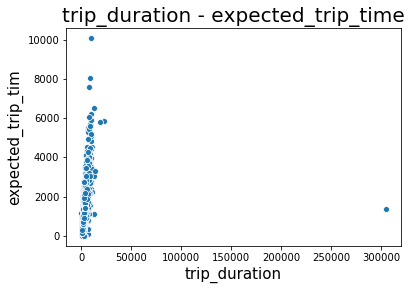

In [83]:
import seaborn as sns
# plt.figure(figsize=(7,5))
g = sns.scatterplot(x="trip_duration",y="expected_trip_time",data=Weather_info)
g.set_title("trip_duration - expected_trip_time", fontsize=20)
g.set_xlabel("trip_duration", fontsize=15)
g.set_ylabel("expected_trip_tim", fontsize=15)


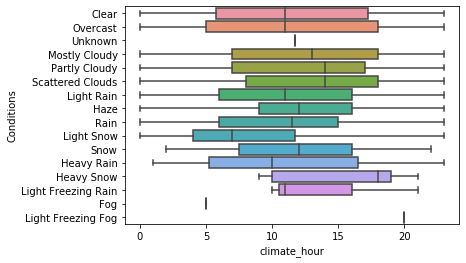

In [84]:
import seaborn as sns
#plt.figure(figsize=(20,5))
sns.boxplot(
    data=Weather_info,
    x='climate_hour',
    y='Conditions',
   )

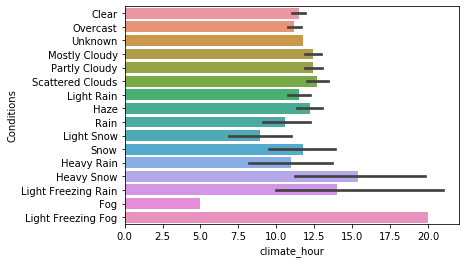

In [85]:
#plt.figure(figsize=(20,5))

sns.barplot(
    
    y='Conditions',
    x='climate_hour',
    data=Weather_info,
        )

d:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


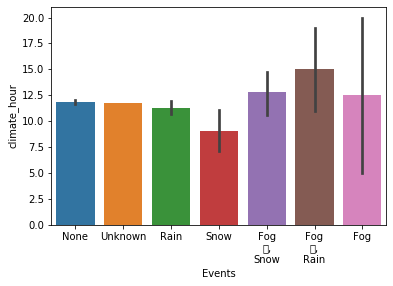

In [86]:
#plt.figure(figsize=(20,5))

sns.barplot(
    
    x='Events',
    y='climate_hour',
    data=Weather_info,
        )

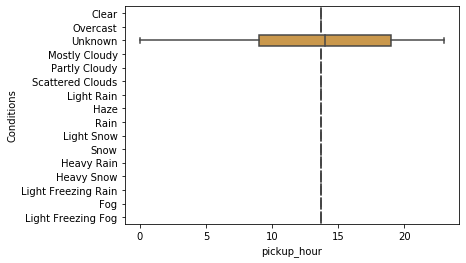

In [87]:
#plt.figure(figsize=(20,5))

sns.boxplot(
    
    y='Conditions',
    x='pickup_hour',
    data=Weather_info,
        )

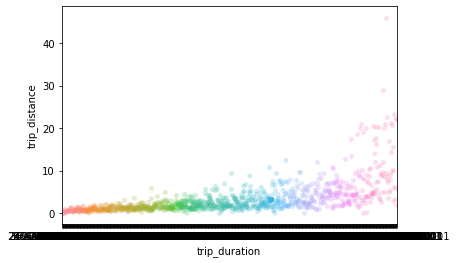

In [88]:
sns.stripplot(x="trip_duration", y="trip_distance", 
              data=Weather_info, dodge=True, jitter=True,
              alpha=.25, zorder=1)